In [2]:
# !pip install jupyter_bokeh
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression

csv_file = 'Resources/pend-gdis-1960-2018-disasterlocations.csv'

In [3]:
# Andy
df = pd.read_csv(csv_file)
df.head()

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189


In [4]:
# Riley
# Creation of clean data frame

clean_df = df[['id','country','year','level','location','disastertype','disasterno','latitude','longitude']]
clean_df.head()

,id,country,year,level,location,disastertype,disasterno,latitude,longitude
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189


In [5]:
# Andy
countries_df = df.groupby(['disastertype'])['level'].count()
countries_df

disastertype
drought                  2938
earthquake               2403
extreme temperature      3506
flood                   17347
landslide                 982
mass movement (dry)        49
storm                   12323
volcanic activity         405
Name: level, dtype: int64

In [6]:
# Riley
disaster_count_df = df.groupby(['level','disasterno']).size()
disaster_count_df

level  disasterno
1      1960-0007     1
       1960-0012     1
       1960-0016     1
       1960-0018     1
       1960-0019     7
                    ..
3      2018-0385     1
       2018-0423     1
       2018-0441     4
       2018-0458     1
       2018-0479     1
Length: 11113, dtype: int64

In [ ]:
# Riley

# Creation of bar graph showcasing different levels
disaster_count_df = df.groupby(['level','disasterno'])
disaster_count_df.plot(kind = 'bar', title = 'Natural Disasters by Level from 1960 to 2018', xlabel = 'Level', ylabel = 'Natural Disasters',color = ['red','blue','green'])
plt.xticks(rotation='horizontal')
plt.show()


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


KeyboardInterrupt: 

In [62]:
# Andy
decades = df

bins = [1960,1970,1980,1990,2000,2010,2020]
group_names = ['1960s','1970s','1980s','1990s','2000s','2010s']

decades['decade'] = pd.cut(df['year'],
                           bins, labels=group_names, 
                           include_lowest=True)
decades.head()


,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude,decade
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317,2000s
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309,2000s
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758,2000s
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987,2000s
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189,2000s


In [63]:
# Andy
floods = df.loc[df['disastertype'] == 'flood']
floods.head()

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude,decade
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317,2000s
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309,2000s
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758,2000s
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987,2000s
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189,2000s


In [64]:
# Andy
floods_w_decades = decades.loc[decades['disastertype'] == 'flood']
floods_by_decades = decades.groupby('decade')['id'].count()
floods_by_decades

/var/folders/nn/h8r4zj6x03jgg9nnxtcg6n0h0000gn/T/ipykernel_30625/1936159871.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  floods_by_decades = decades.groupby('decade')['id'].count()


decade
1960s      814
1970s      898
1980s     2713
1990s     7096
2000s    15756
2010s    12676
Name: id, dtype: int64

In [65]:
# Andy
def geo_plot_by_decade(df, decade):
    points_to_chart = df.loc[df['decade'] == decade]
# Create the map plot
    map_plot = points_to_chart.hvplot.points(
        "longitude",
        "latitude",
        # Configure the map plot
        geo="True", # show geo data
        tiles="OSM",  # OpenStreetMap tiles
        frame_width=700,
        frame_height=500,
        size='level',  # Size of the points determined by Humidity
        color="decade",  # Color by city
        scale=1
    )

    # Display the map
    return map_plot

In [66]:
# Andy
floods_w_decades = floods_w_decades.sort_values('decade')
geo_plot_by_decade(floods_w_decades, '1960s')


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [67]:
geo_plot_by_decade(floods_w_decades, '1970s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [68]:
geo_plot_by_decade(floods_w_decades, '1980s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [69]:
geo_plot_by_decade(floods_w_decades, '1990s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [70]:
geo_plot_by_decade(floods_w_decades, '2000s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [71]:
geo_plot_by_decade(floods_w_decades, '2010s')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [72]:
# Andy
# %%capture --no-display
points_to_chart = floods_w_decades
# Create the map plot
map_plot_floods = points_to_chart.hvplot.points(
    "longitude",
    "latitude",
    # Configure the map plot
    geo="True", # show geo data
    tiles="OSM",  # OpenStreetMap tiles
    frame_width=700,
    frame_height=500,
    size='level',  # Size of the points determined by Humidity
    color="year",  # Color by city
    scale=1
)

# Display the map
map_plot_floods

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (year,level)

In [73]:
# Andy
# %%capture --no-display
points_to_chart = floods_w_decades.loc[floods_w_decades['decade'] == '1970s']
# Create the map plot
map_plot_floods = points_to_chart.hvplot.points(
    "longitude",
    "latitude",
    # Configure the map plot
    geo="True", # show geo data
    tiles="OSM",  # OpenStreetMap tiles
    frame_width=700,
    frame_height=500,
    size='level',  # Size of the points determined by Humidity
    color="decade",  # Color by city
    scale=1
)

# Display the map
map_plot_floods

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (decade,level)

In [74]:
# Andy
storms = df.loc[df['disastertype'] == 'storm']
storms_w_decades = decades.loc[decades['disastertype'] == 'storm']
storms_by_decades = decades.groupby('decade')['id'].count()
storms_by_decades

/var/folders/nn/h8r4zj6x03jgg9nnxtcg6n0h0000gn/T/ipykernel_30625/2225225559.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  storms_by_decades = decades.groupby('decade')['id'].count()


decade
1960s      814
1970s      898
1980s     2713
1990s     7096
2000s    15756
2010s    12676
Name: id, dtype: int64

In [75]:
# Andy
# %%capture --no-display
points_to_chart = storms_w_decades.loc[storms_w_decades['decade'] == '2010s']
# Create the map plot
map_plot_floods = points_to_chart.hvplot.points(
    "longitude",
    "latitude",
    # Configure the map plot
    geo="True", # show geo data
    tiles="OSM",  # OpenStreetMap tiles
    frame_width=700,
    frame_height=500,
    size='level',  # Size of the points determined by Humidity
    color="year",  # Color by city
    scale=1
)

# Display the map
map_plot_floods

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (year,level)

In [76]:
# Riley
def geo_plot_by_decade2(df):
    #points_to_chart = df.loc[df['disastertype'] == disastertype]
    # Create the map plot
    map_plot = df.hvplot.points(
        "longitude",
        "latitude",
        # Configure the map plot
        geo="True", # show geo data
        tiles="OSM",  # OpenStreetMap tiles
        frame_width=700,
        frame_height=500,
        size='level',  # Size of the points determined by Humidity
        color="decade",  # Color by city
        scale=1,
        xlim=(-180, 180),  
        ylim=(-75, 75),
        groupby=['decade', 'disastertype']
    )

    # Display the map
    return map_plot

In [77]:
# Riley
geo_plot_by_decade2(decades)

:DynamicMap   [decade,disastertype]
   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [longitude,latitude]   (decade,level)

In [78]:
# Andy

floods_df = pd.DataFrame(clean_df.loc[clean_df['disastertype'] == 'flood', 'year'])
floods_df

,year
0,2009
1,2009
2,2001
3,2009
4,2009
...,...
39921,1964
39922,1966
39923,1981
39927,1967


In [79]:
floods_by_year = floods_df.groupby('year').value_counts()
fby_df = pd.DataFrame(floods_by_year).reset_index()
# fby_df = fby_df.T
fby_df

,year,count
0,1960,4
1,1961,3
2,1962,1
3,1963,3
4,1964,20
5,1965,19
6,1966,21
7,1967,49
8,1968,18
9,1969,56


In [86]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y): #, xlabel, ylabel, title): #, hemisphere):
    # Set data ranges forformatting plots 
    xlabel = ""
    ylabel = ""
    title = ""
    # Force the x axis to have the same range for easy comparison
    # if hemisphere == 'north': # Northern Hemisphere
    x_min = 1960
    x_max = 2018
    # elif hemisphere == 'south': # Southern Hemisphere
    #     x_min = -80
    #     x_max = 0
        
    x_range = x_max - x_min
    y_min = min(y)
    y_max = max(y)
    y_range = y_max - y_min
    
    # Calc regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    # Calc regress values for y values on line 
    regress_values = x * slope + intercept
    # Format regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print the r^2 value
    print(f'The r^2-value is: {rvalue**2}')
    
    # plot the regression
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,
                 (x_min+x_range*0.05,y_max+y_range*0.1),
                 fontsize=15,
                 color="red")
   
    # plot the data
    plt.scatter(x, y)
    
    # Format plt
    plt.axis([x_min-x_range*0.05, 
              x_max+x_range*0.05, 
              y_min-y_range*0.05, 
              y_max+y_range*0.2])
    plt.title(f'{title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    # Show plot
    plt.show()

The r^2-value is: 0.7991873523638864


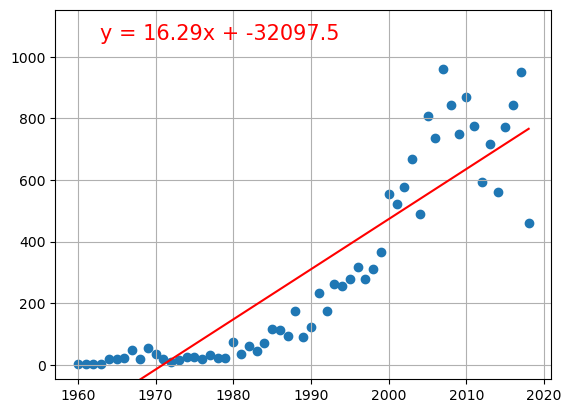

In [87]:
x = fby_df['year']
y = fby_df['count']

plot_linear_regression(x, y)
    # xlabel,
    # ylabel,
    # title)


In [89]:
floods_2024_prediction = 16.29*2024 - 32097.5
floods_2024_prediction

873.4599999999991